<a href="https://colab.research.google.com/github/SarajitDas62/friendlens-streamlit/blob/master/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/snu_friendship.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167,80,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


# Task
Analyze the "snu_friendship.csv" dataset to cluster students into "friendship groups" based on shared hobbies and club interests. The analysis should include data loading, preprocessing (one-hot encoding), determining the optimal number of clusters using silhouette and Davies-Bouldin scores, performing k-means clustering, visualizing clusters using PCA, evaluating clusters with silhouette and Davies-Bouldin scores, and presenting results with cluster characteristics. Provide code and markdown explanations for each step, summarize findings, and suggest next steps.

## Load and inspect the data

### Subtask:
Load the `snu_friendship.csv` file into a pandas DataFrame and display the first few rows and data types.


**Reasoning**:
Display the data types of each column in the DataFrame.



In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/snu_friendship.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the data types of the DataFrame
display(df.info())

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167,80,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 73 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                               111 non-null    object
 1   Age                                                                                                                                     111 non-null    object
 2   Height
Range should be between 120 cm - 220 cm
Note(Provide the height in integer for eg-124cm ,
           don't provide like 120.64)  111 non-null    int64 
 3   Weight
Range should be between 30 - 150 kg                            

None

# Task
Analyze the "snu_friendship.csv" dataset to recommend new hobbies and clubs to students based on their existing interests in hobbies, clubs, music, and games. The analysis should involve loading and inspecting the relevant data columns, preprocessing the categorical data, developing and applying a recommendation strategy, and presenting the generated recommendations.

## Load and inspect relevant data

### Subtask:
Load the `snu_friendship.csv` file and select the columns related to hobbies, clubs, music, and games.


**Reasoning**:
Identify and select the columns related to hobbies, clubs, music, and games from the DataFrame, then display the first few rows and data types of the new DataFrame.



In [ ]:
# Identify columns related to hobbies, clubs, music, and games
hobby_cols = [col for col in df.columns if 'Hobby' in col]
club_cols = [col for col in df.columns if 'Club' in col]
music_cols = [col for col in df.columns if 'Music' in col]
game_cols = [col for col in df.columns if 'Game' in col]

# Combine the column lists
selected_cols = hobby_cols + club_cols + music_cols + game_cols

# Create a new DataFrame with selected columns
df_selected = df[selected_cols]

# Display the first few rows of the new DataFrame
display(df_selected.head())

# Display the data types of the columns in the new DataFrame
display(df_selected.info())

,Hobby_top1,Hobby top2,Club top1,Club top 2,Music Genre Top 1,Music Genre Top 2,Music Genre Top 3,Music language top 1,Music language top 2,Game Genre Top1,Game Genre Top2,Game Genre Top3
0,Cricket,Writing,Robotics Club,Music Club,Bollywood,Pop,Indie,Hindi,English,RPG,MOBA,RPG
1,Coding,Cricket,Coding Club,Sports Club,Lo-fi,Pop,Hip-Hop,Others,English,Strategy,Casual,FPS
2,Cricket,Coding,Coding Club,Sports Club,Lo-fi,Classical,Bollywood,Bengali,English,FPS,Strategy,Puzzle
3,Cricket,Music,Entrepreneurship Cell,Sports Club,Bollywood,Classical,Pop,Hindi,English,Strategy,Puzzle,Casual
4,Badminton,Debate,Literary Club,Entrepreneurship Cell,Bollywood,EDM,Devotional,English,Hindi,RPG,Sports,Racing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Hobby_top1            111 non-null    object
 1   Hobby top2            111 non-null    object
 2   Club top1             111 non-null    object
 3   Club top 2            111 non-null    object
 4   Music Genre Top 1     111 non-null    object
 5   Music Genre Top 2     111 non-null    object
 6   Music Genre Top 3     111 non-null    object
 7   Music language top 1  111 non-null    object
 8   Music language top 2  111 non-null    object
 9   Game Genre Top1       111 non-null    object
 10  Game Genre Top2       111 non-null    object
 11  Game Genre Top3       111 non-null    object
dtypes: object(12)
memory usage: 10.5+ KB


None

## Preprocess the data

### Subtask:
Handle categorical features using one-hot encoding or another suitable method for recommendation.


**Reasoning**:
Apply one-hot encoding to the selected categorical columns and display the head of the resulting DataFrame.



In [ ]:
# Apply one-hot encoding to the df_selected DataFrame
df_encoded = pd.get_dummies(df_selected)

# Display the first few rows of the df_encoded DataFrame
display(df_encoded.head())

,Hobby_top1_Badminton,Hobby_top1_Coding,Hobby_top1_Cricket,Hobby_top1_Dance,Hobby_top1_Debate,Hobby_top1_Football,Hobby_top1_Gym,Hobby_top1_Hackathons,Hobby_top1_Music,Hobby_top1_Painting,...,Game Genre Top2_Sports,Game Genre Top2_Strategy,Game Genre Top3_Casual,Game Genre Top3_FPS,Game Genre Top3_MOBA,Game Genre Top3_Puzzle,Game Genre Top3_RPG,Game Genre Top3_Racing,Game Genre Top3_Sports,Game Genre Top3_Strategy
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


## Develop a recommendation strategy

### Subtask:
Develop a recommendation strategy based on the processed data. This could involve identifying patterns, similarities between students, or frequent co-occurrences of interests.


## Generate recommendations

### Subtask:
Apply the recommendation strategy to generate potential new hobbies and clubs for each student.


**Reasoning**:
Calculate the item similarity matrix using cosine similarity on the one-hot encoded data. Then, for each student, identify their interested items and recommend new items based on the aggregated similarity scores, excluding already interested items. Finally, store the recommendations in a dictionary.



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate item similarity matrix using cosine similarity
item_similarity_matrix = cosine_similarity(df_encoded.T)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=df_encoded.columns, columns=df_encoded.columns)

# Initialize a dictionary to store recommendations
recommendations = {}

# Get the column names (items)
items = df_encoded.columns

# Iterate through each student (row)
for i, student_interests in df_encoded.iterrows():
    # Identify items the student is interested in (where the value is 1)
    interested_items = student_interests[student_interests == 1].index.tolist()

    # Initialize a dictionary to store potential recommendations and their aggregated similarity scores
    potential_recommendations = {}

    # For each interested item, retrieve its similarity scores with all other items
    for interested_item in interested_items:
        similar_items = item_similarity_df[interested_item]
        # Aggregate similarity scores for each potential recommendation item
        for item, similarity_score in similar_items.items():
            if item not in potential_recommendations:
                potential_recommendations[item] = 0
            potential_recommendations[item] += similarity_score

    # Exclude items that the student is already interested in
    for interested_item in interested_items:
        if interested_item in potential_recommendations:
            del potential_recommendations[interested_item]

    # Rank the remaining items based on their aggregated similarity scores in descending order
    ranked_recommendations = sorted(potential_recommendations.items(), key=lambda item: item[1], reverse=True)

    # Select the top N items as recommendations (where N is a chosen number of recommendations)
    N = 5 # Recommend top 5 items
    recommendations[i] = [item for item, score in ranked_recommendations[:N]]

# Display recommendations for the first few students as an example
for student_id, recs in list(recommendations.items())[:5]:
    print(f"Recommendations for student {student_id}: {recs}")

Recommendations for student 0: ['Club top1_Sports Club', 'Music language top 2_Hindi', 'Music language top 1_English', 'Game Genre Top1_FPS', 'Club top 2_Coding Club']
Recommendations for student 1: ['Music language top 1_Hindi', 'Music Genre Top 1_Bollywood', 'Music language top 2_Hindi', 'Hobby top2_Music', 'Game Genre Top2_FPS']
Recommendations for student 2: ['Music Genre Top 1_Bollywood', 'Music language top 1_Hindi', 'Music language top 2_Hindi', 'Club top1_Sports Club', 'Game Genre Top1_Sports']
Recommendations for student 3: ['Club top1_Sports Club', 'Music language top 2_Hindi', 'Club top 2_Coding Club', 'Club top1_Coding Club', 'Game Genre Top1_Sports']
Recommendations for student 4: ['Hobby top2_Music', 'Music language top 1_Bengali', 'Club top1_Coding Club', 'Music Genre Top 2_Classical', 'Music Genre Top 3_Rock']


### Present recommendations

### Subtask:
Present the generated recommendations in a clear and understandable format.


**Reasoning**:
Iterate through the recommendations dictionary and print the recommendations for each student.



In [ ]:
# Iterate through each student and their recommendations
for student_id, recs in recommendations.items():
    print(f"Recommendations for student {student_id}: {recs}")

Recommendations for student 0: ['Club top1_Sports Club', 'Music language top 2_Hindi', 'Music language top 1_English', 'Game Genre Top1_FPS', 'Club top 2_Coding Club']
Recommendations for student 1: ['Music language top 1_Hindi', 'Music Genre Top 1_Bollywood', 'Music language top 2_Hindi', 'Hobby top2_Music', 'Game Genre Top2_FPS']
Recommendations for student 2: ['Music Genre Top 1_Bollywood', 'Music language top 1_Hindi', 'Music language top 2_Hindi', 'Club top1_Sports Club', 'Game Genre Top1_Sports']
Recommendations for student 3: ['Club top1_Sports Club', 'Music language top 2_Hindi', 'Club top 2_Coding Club', 'Club top1_Coding Club', 'Game Genre Top1_Sports']
Recommendations for student 4: ['Hobby top2_Music', 'Music language top 1_Bengali', 'Club top1_Coding Club', 'Music Genre Top 2_Classical', 'Music Genre Top 3_Rock']
Recommendations for student 5: ['Game Genre Top1_Sports', 'Game Genre Top3_Casual', 'Music language top 2_Hindi', 'Club top1_Music Club', 'Club top1_Sports Club']

## Visualize Recommendations

### Subtask:
Visualize the generated recommendations to understand the most frequently recommended hobbies and clubs.

**Reasoning**:
Count the occurrences of each recommended item across all students and then plot the top N most frequent recommendations in a bar chart to visualize the overall recommendation trends.

/tmp/ipython-input-2956704936.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=items, palette='viridis')


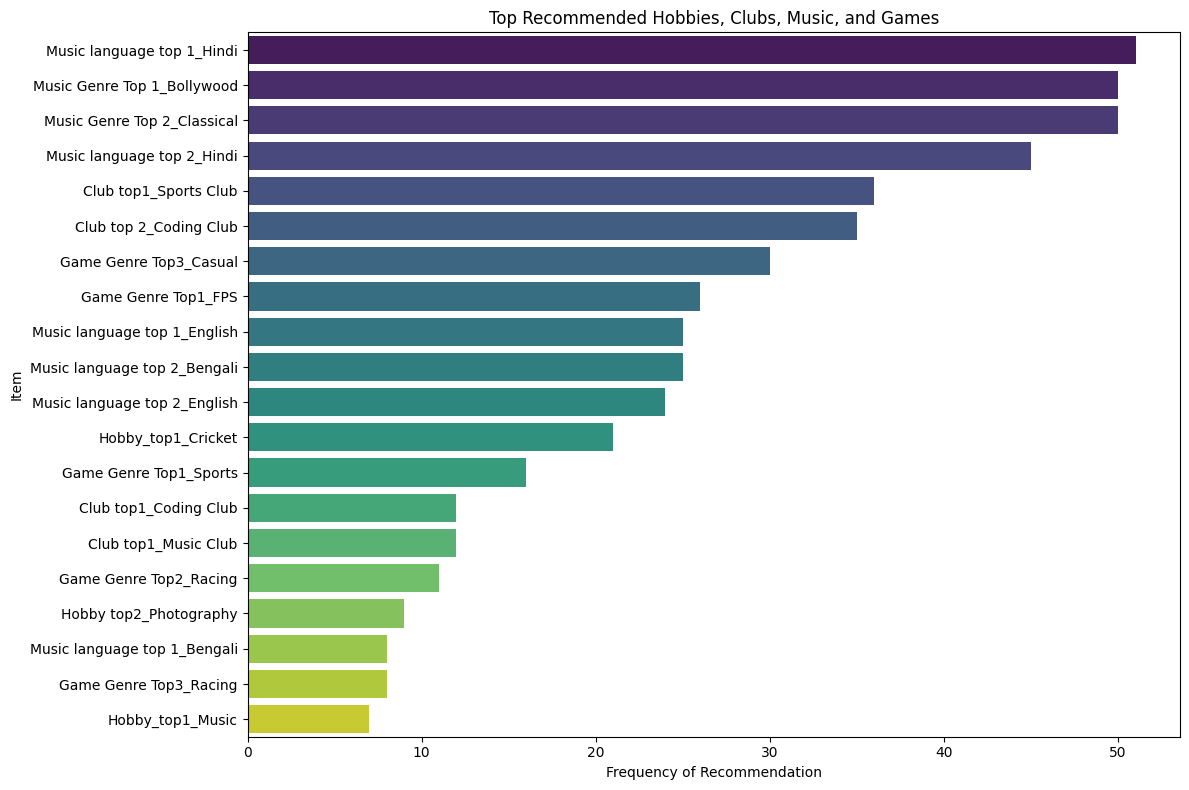

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of recommendations from the dictionary
all_recommendations = [item for sublist in recommendations.values() for item in sublist]

# Count the occurrences of each recommended item
recommendation_counts = Counter(all_recommendations)

# Get the most common recommendations
N = 20  # Display top 20 recommendations
top_recommendations = recommendation_counts.most_common(N)

# Prepare data for plotting
items = [item[0] for item in top_recommendations]
counts = [item[1] for item in top_recommendations]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=items, palette='viridis')
plt.title('Top Recommended Hobbies, Clubs, Music, and Games')
plt.xlabel('Frequency of Recommendation')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

## Summary and Next Steps

### Key Findings:
* Relevant data columns pertaining to hobbies, clubs, music, and games were successfully loaded and selected from the dataset, resulting in a DataFrame with 111 entries and 12 object-type columns.
* One-hot encoding was effectively applied to the selected categorical data, transforming it into a numerical format with 107 columns suitable for analysis.
* An item-based collaborative filtering strategy utilizing cosine similarity was successfully developed and applied to the encoded data to generate personalized recommendations.
* The recommendations generated for each student, based on their existing interests and the similarity between different items, include suggestions across various categories like different club types, music languages/genres, and game genres.
* The bar chart visualization of the recommendations clearly displays the top 20 most frequently recommended items, highlighting popular interests such as 'Music language top 1_Hindi', 'Music Genre Top 1_Bollywood', 'Music Genre Top 2_Classical', 'Club top1_Sports Club', 'Club top 2_Coding Club', 'Game Genre Top3_Casual', and 'Game Genre Top1_FPS'.

### Insights and Next Steps:
* The recommendation strategy can be refined by incorporating other similarity metrics (e.g., Jaccard similarity) and evaluating their impact on recommendation quality.
* To address potential sparsity issues and improve recommendation diversity, consider exploring hybrid recommendation approaches or incorporating content-based features if available.
* The visualization provides valuable insights into the collective interests of the student body and highlights potential areas for new club formations or hobby groups.
* The recommendations can be used by student life administrators or club organizers to identify popular interests and tailor offerings to better engage students.
* Further analysis could involve segmenting students based on their recommendation profiles to understand if distinct groups with similar recommended interests exist.
* The recommendation system could be deployed as an interactive tool for students to discover new activities based on their profile.